In [1]:
import numpy as np
%matplotlib inline
from astropy import units
from astropy import constants
from astropy.table import Table
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm


import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from astropy.io import fits
from astropy.io import ascii
from astropy.table import QTable, Table
from astropy.wcs import WCS
import astropy.units as u

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 6
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size']  = 5 #12
plt.rcParams['ytick.major.size']  = 5#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 2
plt.rcParams['ytick.minor.size']  = 2

plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec
import os

In [2]:
#sys.argv[1]

def decamplot(ax,infile = './1998_FR11_10_c4d_160115_055620_ooi_r_ls9',normalizer=5):
    obox_smallIma = 15
    obox_ima = 30
    obox_largeIma = 200
    oprof = 10

    pix =  0.1943801 


    profC   = ascii.read(infile+ '_C.ecsv')
    profCav = ascii.read(infile+ '_Cav.ecsv')
    profSav = ascii.read(infile+ '_Sav.ecsv')

    skys = 10.


    fs=9

    #fig,ax = plt.subplots()

    ax.scatter(  profC['r_arcsec'], profC['flux_sky']/max(profSav['flux_sky'][normalizer:]), color='none',
             marker='o',s=smallsize,lw=linewidth,label=r'Object Pixels'
             ,edgecolor= '#3a0ca3',zorder=4,alpha=0.5)
    #ax.plot    ( profCav['r_arcsec'], profCav['flux_sky'], color='k')
    ax.errorbar( profCav['r_arcsec'], profCav['flux_sky']/max(profSav['flux_sky'][normalizer:]), yerr=profCav['flux_skys']/max(profSav['flux_sky'][normalizer:]),
                fmt='o',ms=smallestsize,lw=linewidth,capsize=2,
                              capthick=2,color=color1,ecolor=color1,
                mec='#000000',zorder=12,label=r'Object Average')
    ax.plot( profSav['r_arcsec'],
                profSav['flux_sky']/profSav['flux_sky'][0]*profCav['flux_sky'][0]/max(profSav['flux_sky'][normalizer:]),
                color='#f72585',lw=linewidth*2,label='Reference Star',zorder=10)

    #ax.set_xlim(-0.1,(oprof+0.5)*pix)
    #ax.set_ylim(-skys, max(profCav['flux_sky'])*10.1)
    #ax.set_ylim(0.1, max(profCav['flux_sky'])*1.1)

    #ax.set_xlabel('Radius [arcsec]')
    #ax.set_ylabel('Flux [adu/pix]')
    return None
def VLTplot(ax,normalizer=1):
    rootFile = './Sima_cM'
    profFile = rootFile+'_profAll.fits'
    profAvFile = rootFile+'_profAv.fits'
    profStFile = rootFile+'_profAvStar.fits'



    t = fits.open(profFile)
    prof = Table( t[1].data)

    t = fits.open(profAvFile)
    profAv = Table( t[1].data)

    t = fits.open(profStFile)
    profSt = Table( t[1].data)


    ephem = ascii.read(rootFile + '_eph.ecsv')

    mySky= np.average(prof['fluxStar'][  (prof['radarcsec'] > 2.) &
                                       (prof['radarcsec'] < 5.)   ])
    print('MySky', mySky)

    mySky = .15
    prof['fluxStar'] = prof['fluxStar'] - mySky
    profAv['fluxStar'] = profAv['fluxStar'] - mySky


    ax.plot(profSt['radarcsec'], 
             profSt['fluxStar']/profSt['fluxStar'][0]*prof['fluxStar'][0]/max(profSt['fluxStar'][normalizer:]), 
             color='#f72585',lw=linewidth*2,label='Reference Star',zorder=10)
    ax.scatter(prof['radarcsec']-0.05, prof['fluxStar']/max(profSt['fluxStar'][normalizer:]), 
                color='none',marker='o',s=smallsize,lw=linewidth,label=r'Object Pixels'
             ,edgecolor= '#3a0ca3',zorder=4,alpha=0.5)
    ax.errorbar(profAv['radarcsec'], profAv['fluxStar']/max(profSt['fluxStar'][normalizer:]), profAv['fluxStars']/max(profSt['fluxStar'][normalizer:]),
                 fmt='o',ms=smallestsize,lw=linewidth,capsize=2,
                              capthick=2,color=color1,ecolor=color1,mec='#000000',zorder=12,
                label=r'Object Average')

    return None

In [3]:
def open_fits_VLTSTACK(fn):
    hdu = fits.open(fn)
    return hdu
def plot_frame_VLTSTACK(data, ax, index=0,  size=21):
   
    cutout = data[index].data#[x-size:x+size, y-size:y+size]
    
    img = ax.imshow(cutout, aspect='equal',
                    #extent=[x-size, x+size, y-size, y+size], 
                    cmap='Greys',
                    vmin=np.nanmin(cutout), vmax=np.nanpercentile(cutout, 99.95),
                    origin='lower')
    linewidth=0.7

    
    return img, np.nanmin(cutout), np.nanpercentile(cutout, 99.95)



In [4]:
targets = np.sort([i for i in os.listdir('./') if i.endswith('.fits')])
tables = np.sort([i for i in os.listdir('./') if i.endswith('.csv') and 'comet' in i])[:-1]
print(targets)
def open_fits(fn):
    hdu = fits.open(fn)
    return hdu

def plot_frame(data, index, ax, size=21):
    
    x = int(data[index].header['COMET_X'])
    y = int(data[index].header['COMET_Y'])
    
    cutout = data[index].data[x-size:x+size, y-size:y+size]
    
    img = ax.imshow(cutout, aspect='equal',
                    extent=[x-size, x+size, y-size, y+size], cmap='Greys',
                    vmin=np.nanmin(cutout), vmax=np.nanpercentile(cutout, 99.95),
                    origin='lower')
    linewidth=0.7

    xticks = np.linspace(x-size+2, x+size-2, 3, dtype=int)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, fontsize=fs2)
    
    yticks = np.linspace(y-size+2, y+size-2, 3, dtype=int)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks, fontsize=fs2)
    
    return img, x, y, np.nanmin(cutout), np.nanpercentile(cutout, 99.95)

['1998_FR11.fits' '2001_ME1.fits' 'Sima_cM_profAll.fits'
 'Sima_cM_profAv.fits' 'Sima_cM_profAvStar.fits']


MySky -0.0109091
1998_FR11.fits
idx, 0
2001_ME1.fits
idx, 1


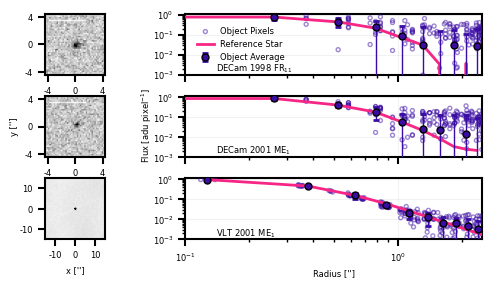

In [8]:
cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(3, 2, tight_layout=False,figsize=(2.*8.7*cm,7.43*cm),sharex=False,sharey=False
                       ,gridspec_kw={'hspace': 0.35, 'wspace': -0.05,'width_ratios':[1,1.2]})
color1='#3a0ca3'
linewidth=1
size=30
smallsize=8
smallestsize=5
decamplot(axs[0,1],normalizer=1)
decamplot(axs[1,1],infile ='./2001_ME1_37_c4d_220512_082235_ooi_i_yse')
VLTplot(axs[2,1],normalizer=3)

fs=6

axs[0,1].grid(color='k',alpha=0.05)
axs[1,1].grid(color='k',alpha=0.05)
axs[2,1].grid(color='k',alpha=0.05)

fig.text(0.4, 0.5, r'Flux [adu pixel$^{-1}$]', va='center', rotation='vertical',fontsize=fs)

axs[2,1].set_xlabel('Radius [\'\']',fontsize=fs)

color1='#3a0ca3'

axs[0,1].legend(fancybox=True, framealpha=1, shadow=False, borderpad=.92,#,bbox_to_anchor=(1.05,1.1),
            frameon=False, loc='center left', ncol=1)#,prop={'size': 15},facecolor='none')


fs2=6
delta2=0.05
axs[0,1].annotate(r'DECam 1998 FR$_{11}$',(0.14,0.0005+0.001),rotation=0,fontsize=fs2)
axs[1,1].annotate(r'DECam 2001 ME$_1$',(0.14,0.0005+0.001),rotation=0,fontsize=fs2)

axs[2,1].annotate(r'VLT 2001 ME$_1$',(0.14,0.0005+0.001),rotation=0,fontsize=fs2)

axs[0,1].set_xscale('log')
axs[1,1].set_xscale('log')

axs[2,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[1,1].set_yscale('log')

axs[2,1].set_yscale('log')
axs[2,1].set_xlim([0.1,2.5])
axs[1,1].set_xlim([0.1,2.5])
axs[0,1].set_xlim([0.1,2.5])


axs[2,1].set_ylim([0.001,1.1])
axs[1,1].set_ylim([0.001,1.1])
axs[0,1].set_ylim([0.001,1.1])



axs[1,1].set_xticklabels([])
axs[0,1].set_xticklabels([])



data_VLTSTACK = open_fits_VLTSTACK('./rSima_cM.fits')
#data=fits.open('rSima_cM.fits')
#data[0].data.shape
img, vmin, vmax = plot_frame_VLTSTACK(data_VLTSTACK, axs[2,0])#, axes[i], size=size[idx])
#plt.imshow(data[0].data,cmap='Greys',vmin=np.nanmin(data[0].data), vmax=np.nanpercentile(data[0].data, 99.95))
#axs[2,0].set_xlabel('x pixel')#, fontweight='bold')

#fig.text(-0.03, 0.5, 'y pixel', ha='center', va='center', rotation='vertical')

#axs[2,0].text(s=r'(c) 2001 ME$_1$', x=5, y=200, #fontweight='bold',
                  # fontsize=fs2, zorder=100)



#################


#axes = axes.reshape(-1)

frame = [20, 13, 40, 50, 
         20, 
         10, 24, 10, 38, 20, 20]

frame = [13,40]
size = [21, 21, 21, 21, 
        21, 
        21, 21, 21, 21, 21, 21]
letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

for i, idx in enumerate([0, 1]):
    data = open_fits('./'+targets[idx])
    print(targets[idx])
    print("idx,",idx)
    img, x, y, vmin, vmax = plot_frame(data, frame[idx], axs[i,0], size=size[idx])
    
    #cbar = plt.colorbar(img, ax=axes[i])
    #ticks = np.linspace(vmin+10, vmax-5, 3, dtype=int)
    #cbar.set_ticks(ticks)
    #cbar.set_ticklabels(ticks, fontsize=fs2)
    
    name = ' '.join(e for e in targets[idx].split('.')[0].split('_'))
    if name == '2003 XY20':
        name = '2013 XY20'
    
    #axs[i,0].text(s='({0}) {1}'.format(letter[i], name), 
                  # x=x-size[idx]+2, y=y+size[idx]-5, #fontweight='bold',
                   #fontsize=fs2, zorder=100)
    
    if i == 3:
        length = 32
    else:
        length = 28
        
    axs[i,0].plot(np.linspace(x-size[idx]+3, x-size[idx]+length, 10),
                   np.full(10, y+size[idx]-3.8), color='w', lw=linewidth,
                   alpha=0.8, zorder=20)
    
    data.close()
    

axs[1,0].set_ylabel('y [\'\']')#, fontweight='bold')
axs[2,0].set_xlabel('x [\'\']')#, fontweight='bold')

#axs[1,0].axis('off')
#axs[0,0].axis('off')
#axs[2,0].set_xticks([])
#axs[2,0].set_yticks([])
#axs[1,0].set_xticks([])
#axs[1,0].set_yticks([])
axs[0,0].set_xticklabels(['-4','0','4'])
axs[0,0].set_yticklabels(['-4','0','4'])

axs[1,0].set_xticklabels(['-4','0','4'])
axs[1,0].set_yticklabels(['-4','0','4'])


axs[2,0].set_xticks([40,120,200])
axs[2,0].set_yticks([40,120,200])
axs[2,0].set_xticklabels(['-10','0','10'])
axs[2,0].set_yticklabels(['-10','0','10'])




#plt.subplots_adjust(wspace=0.35, hspace=0.3)
plt.savefig('Figure4_Combined_Vector.pdf',
            format='pdf',bbox_inches='tight', dpi=600)
